### NDF Fitting parameters and Plots

Feb. 24, 2023

Samples:
- MF-110 (300K)
- MF-112a (UChicago sample) (300K)
- MF-112b (UCSD sample) (300K)
- MF-114 (300K and 77 K)

Material thicknesses listed later in the parameter section.

In [ ]:
%matplotlib notebook

import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from latrt_testing.tod_ops import smooth
# import matplotlib
# import matplotlib.font_manager as font_manager

# plt.style.use('/home/shreyas/software/plotsettings/plotsettings/matplotlibrc_lab')

# font_manager.fontManager.addfont(
#     "/home/shreyas/software/plotsettings/fonts/Helvetica-Neue-Light.ttf"
# )

# matplotlib.rcParams["font.family"] = "Helvetica Neue"
# %config InlineBackend.figure_format = 'retina'

In [ ]:
# Packages specifically for the plotting and fitting.
from latrt_testing.tod_ops import smooth

import astropy.units as u
import astropy.constants as cons

In [415]:
# Load and smooth data, also remove data at higher frequencies where noise dominates.
MF110_trans = np.genfromtxt("/data/users/shreyas/final_ndf_files/transmission12deg/t_mf110_thin_30-300ghz_0622.txt")
MF110_reflect = np.genfromtxt("/data/users/shreyas/final_ndf_files/reflection2021/mf110_refl_uchi_30-500GHz_300K.txt")

fmax = 300

msk = np.all([ MF110_reflect[:,0]<= fmax], axis=0)
meas_r_freqs_mf110 = MF110_reflect[msk,0]
meas_r_mf110 = MF110_reflect[msk,1]

msk = np.all([ MF110_trans[:,0]<= fmax], axis=0)

meas_t_freqs_mf110 = MF110_trans[msk,0]
meas_t_mf110 = MF110_trans[msk,1]

win=41

meas_r_freqs_smooth_mf110 = smooth(meas_r_freqs_mf110,win)[win:-win]
meas_r_smooth_mf110 = smooth(meas_r_mf110,win)[win:-win]
meas_t_freqs_smooth_mf110 = smooth(meas_t_freqs_mf110,win)[win:-win]
meas_t_smooth_mf110 = smooth(meas_t_mf110,win)[win:-win]

In [416]:
MF112a_trans = np.genfromtxt("/data/users/shreyas/final_ndf_files/transmission12deg/t_mf112_hex_12deg_300k_30-300ghz.txt")
MF112a_reflect = np.genfromtxt("/data/users/shreyas/final_ndf_files/reflection2021/mf112_refl_uchi_30-500GHz_300K.txt")

fmax = 300

msk = np.all([ MF112a_reflect[:,0]<= fmax], axis=0)
meas_r_freqs_mf112a = MF112a_reflect[msk,0]
meas_r_mf112a = MF112a_reflect[msk,1]

msk = np.all([ MF112a_trans[:,0]<= fmax], axis=0)

meas_t_freqs_mf112a = MF112a_trans[msk,0]
meas_t_mf112a = MF112a_trans[msk,1]

win=41

meas_r_freqs_smooth_mf112a = smooth(meas_r_freqs_mf112a,win)[win:-win]
meas_r_smooth_mf112a = smooth(meas_r_mf112a,win)[win:-win]
meas_t_freqs_smooth_mf112a = smooth(meas_t_freqs_mf112a,win)[win:-win]
meas_t_smooth_mf112a = smooth(meas_t_mf112a,win)[win:-win]

In [417]:
MF112b_trans = np.genfromtxt("/data/users/shreyas/final_ndf_files/transmission12deg/mf112_ucsd_tm_30-300ghz_300k_20211207.txt")
MF112b_reflect = np.genfromtxt("/data/users/shreyas/final_ndf_files/reflection2021/mf112_refl_ucsd_30-500GHz_300K.txt")

fmax = 300

msk = np.all([ MF112b_reflect[:,0]<= fmax], axis=0)
meas_r_freqs_mf112b = MF112b_reflect[msk,0]
meas_r_mf112b = MF112b_reflect[msk,1]

msk = np.all([ MF112b_trans[:,0]<= fmax], axis=0)

meas_t_freqs_mf112b = MF112b_trans[msk,0]
meas_t_mf112b = MF112b_trans[msk,1]

win=41

meas_r_freqs_smooth_mf112b = smooth(meas_r_freqs_mf112b,win)[win:-win]
meas_r_smooth_mf112b = smooth(meas_r_mf112b,win)[win:-win]
meas_t_freqs_smooth_mf112b = smooth(meas_t_freqs_mf112b,win)[win:-win]
meas_t_smooth_mf112b = smooth(meas_t_mf112b,win)[win:-win]

In [418]:
MF112c_trans = np.genfromtxt("/data/users/shreyas/final_ndf_files/transmission12deg/t_mf112_1in_12deg_300k_30-300ghz.txt")
MF112c_reflect = np.genfromtxt("/data/users/shreyas/final_ndf_files/reflection2021/mf112_refl_ucsd_1inch_30-500GHz_300K.txt")

fmax112c = 140

msk = np.all([ MF112c_reflect[:,0]<= fmax112c], axis=0)
meas_r_freqs_mf112c = MF112c_reflect[msk,0]
meas_r_mf112c = MF112c_reflect[msk,1]

msk = np.all([ MF112c_trans[:,0]<= fmax112c], axis=0)

meas_t_freqs_mf112c = MF112c_trans[msk,0]
meas_t_mf112c = MF112c_trans[msk,1]

win=41

meas_r_freqs_smooth_mf112c = smooth(meas_r_freqs_mf112c,win)[win:-win]
meas_r_smooth_mf112c = smooth(meas_r_mf112c,win)[win:-win]
meas_t_freqs_smooth_mf112c = smooth(meas_t_freqs_mf112c,win)[win:-win]
meas_t_smooth_mf112c = smooth(meas_t_mf112c,win)[win:-win]

In [419]:
MF114_trans = np.genfromtxt("/data/users/shreyas/final_ndf_files/transmission12deg/t_mf114_hex_12deg_300k_30-300ghz.txt")
MF114_reflect = np.genfromtxt("/data/users/shreyas/final_ndf_files/reflection2021/mf114_refl_uchi_30-500GHz_300K.txt")

fmax114 = 235

msk = np.all([ MF114_reflect[:,0]<= fmax114], axis=0)
meas_r_freqs_mf114 = MF114_reflect[msk,0]
meas_r_mf114 = MF114_reflect[msk,1]

msk = np.all([ MF114_trans[:,0]<= fmax114], axis=0)

meas_t_freqs_mf114 = MF114_trans[msk,0]
meas_t_mf114 = MF114_trans[msk,1]

win=41

meas_r_freqs_smooth_mf114 = smooth(meas_r_freqs_mf114,win)[win:-win]
meas_r_smooth_mf114 = smooth(meas_r_mf114,win)[win:-win]
meas_t_freqs_smooth_mf114 = smooth(meas_t_freqs_mf114,win)[win:-win]
meas_t_smooth_mf114 = smooth(meas_t_mf114,win)[win:-win]

### Below are the final fitting parameters.

- For any set of parameters, these are the variables the values represent: <code>p11x = [n_re, v0, a, b]</code>.
- <code>tau11x</code> is the thickness in mm.
- Constants are: <code>[thickness, v0, angle of incidence for reflection, angle of incidence for transmission]</code>
- MF-112 a is the UChicago sample.
- MF-112 b is the UCSD sample.
- MF-112 c is the thicker UCSD sample.
- Fitting params for 300K data.

In [422]:
v0=60
# mf-110
p110= [1.84757354, 60, 0.01199971, 0.43770407] 
tau110=6.851*u.mm
constants110 = [tau110, # thickness ta
                  v0, #pivot freq, GHz
    np.radians(13.5), # reflection
    np.radians(12), # transmission
]
# mf-112a
p112a= [2.25409709, 60, 0.04839579, 0.36294532] 
tau112a=6.913*u.mm

constants112a = [tau112a, # thickness ta
                  v0, #pivot freq, GHz
    np.radians(13.5), # reflection
    np.radians(12), # transmission
]
# mf-112b
p112b=  [2.33401973, 60, 0.07407253, 0.30854538] 
tau112b=6.7*u.mm

constants112b = [tau112b, # thickness ta
                  v0, #pivot freq, GHz
    np.radians(13.5), # reflection
    np.radians(40), # transmission
]
# mf-112c
p112c= [2.2030326, 60, 0.06174298, 0.47407758] 
tau112c=27*u.mm

constants112c = [tau112c, # thickness ta
                  v0, #pivot freq, GHz
    np.radians(13.5), # reflection
    np.radians(40), # transmission
]
# mf-114
p114=[2.80435925, 60, 0.09509897, 0.44987745]
tau114=6.296*u.mm

constants114 = [tau114, # thickness ta
                  v0, #pivot freq, GHz
    np.radians(13.5), # reflection
    np.radians(12), # transmission
]

<IPython.core.display.Javascript object>


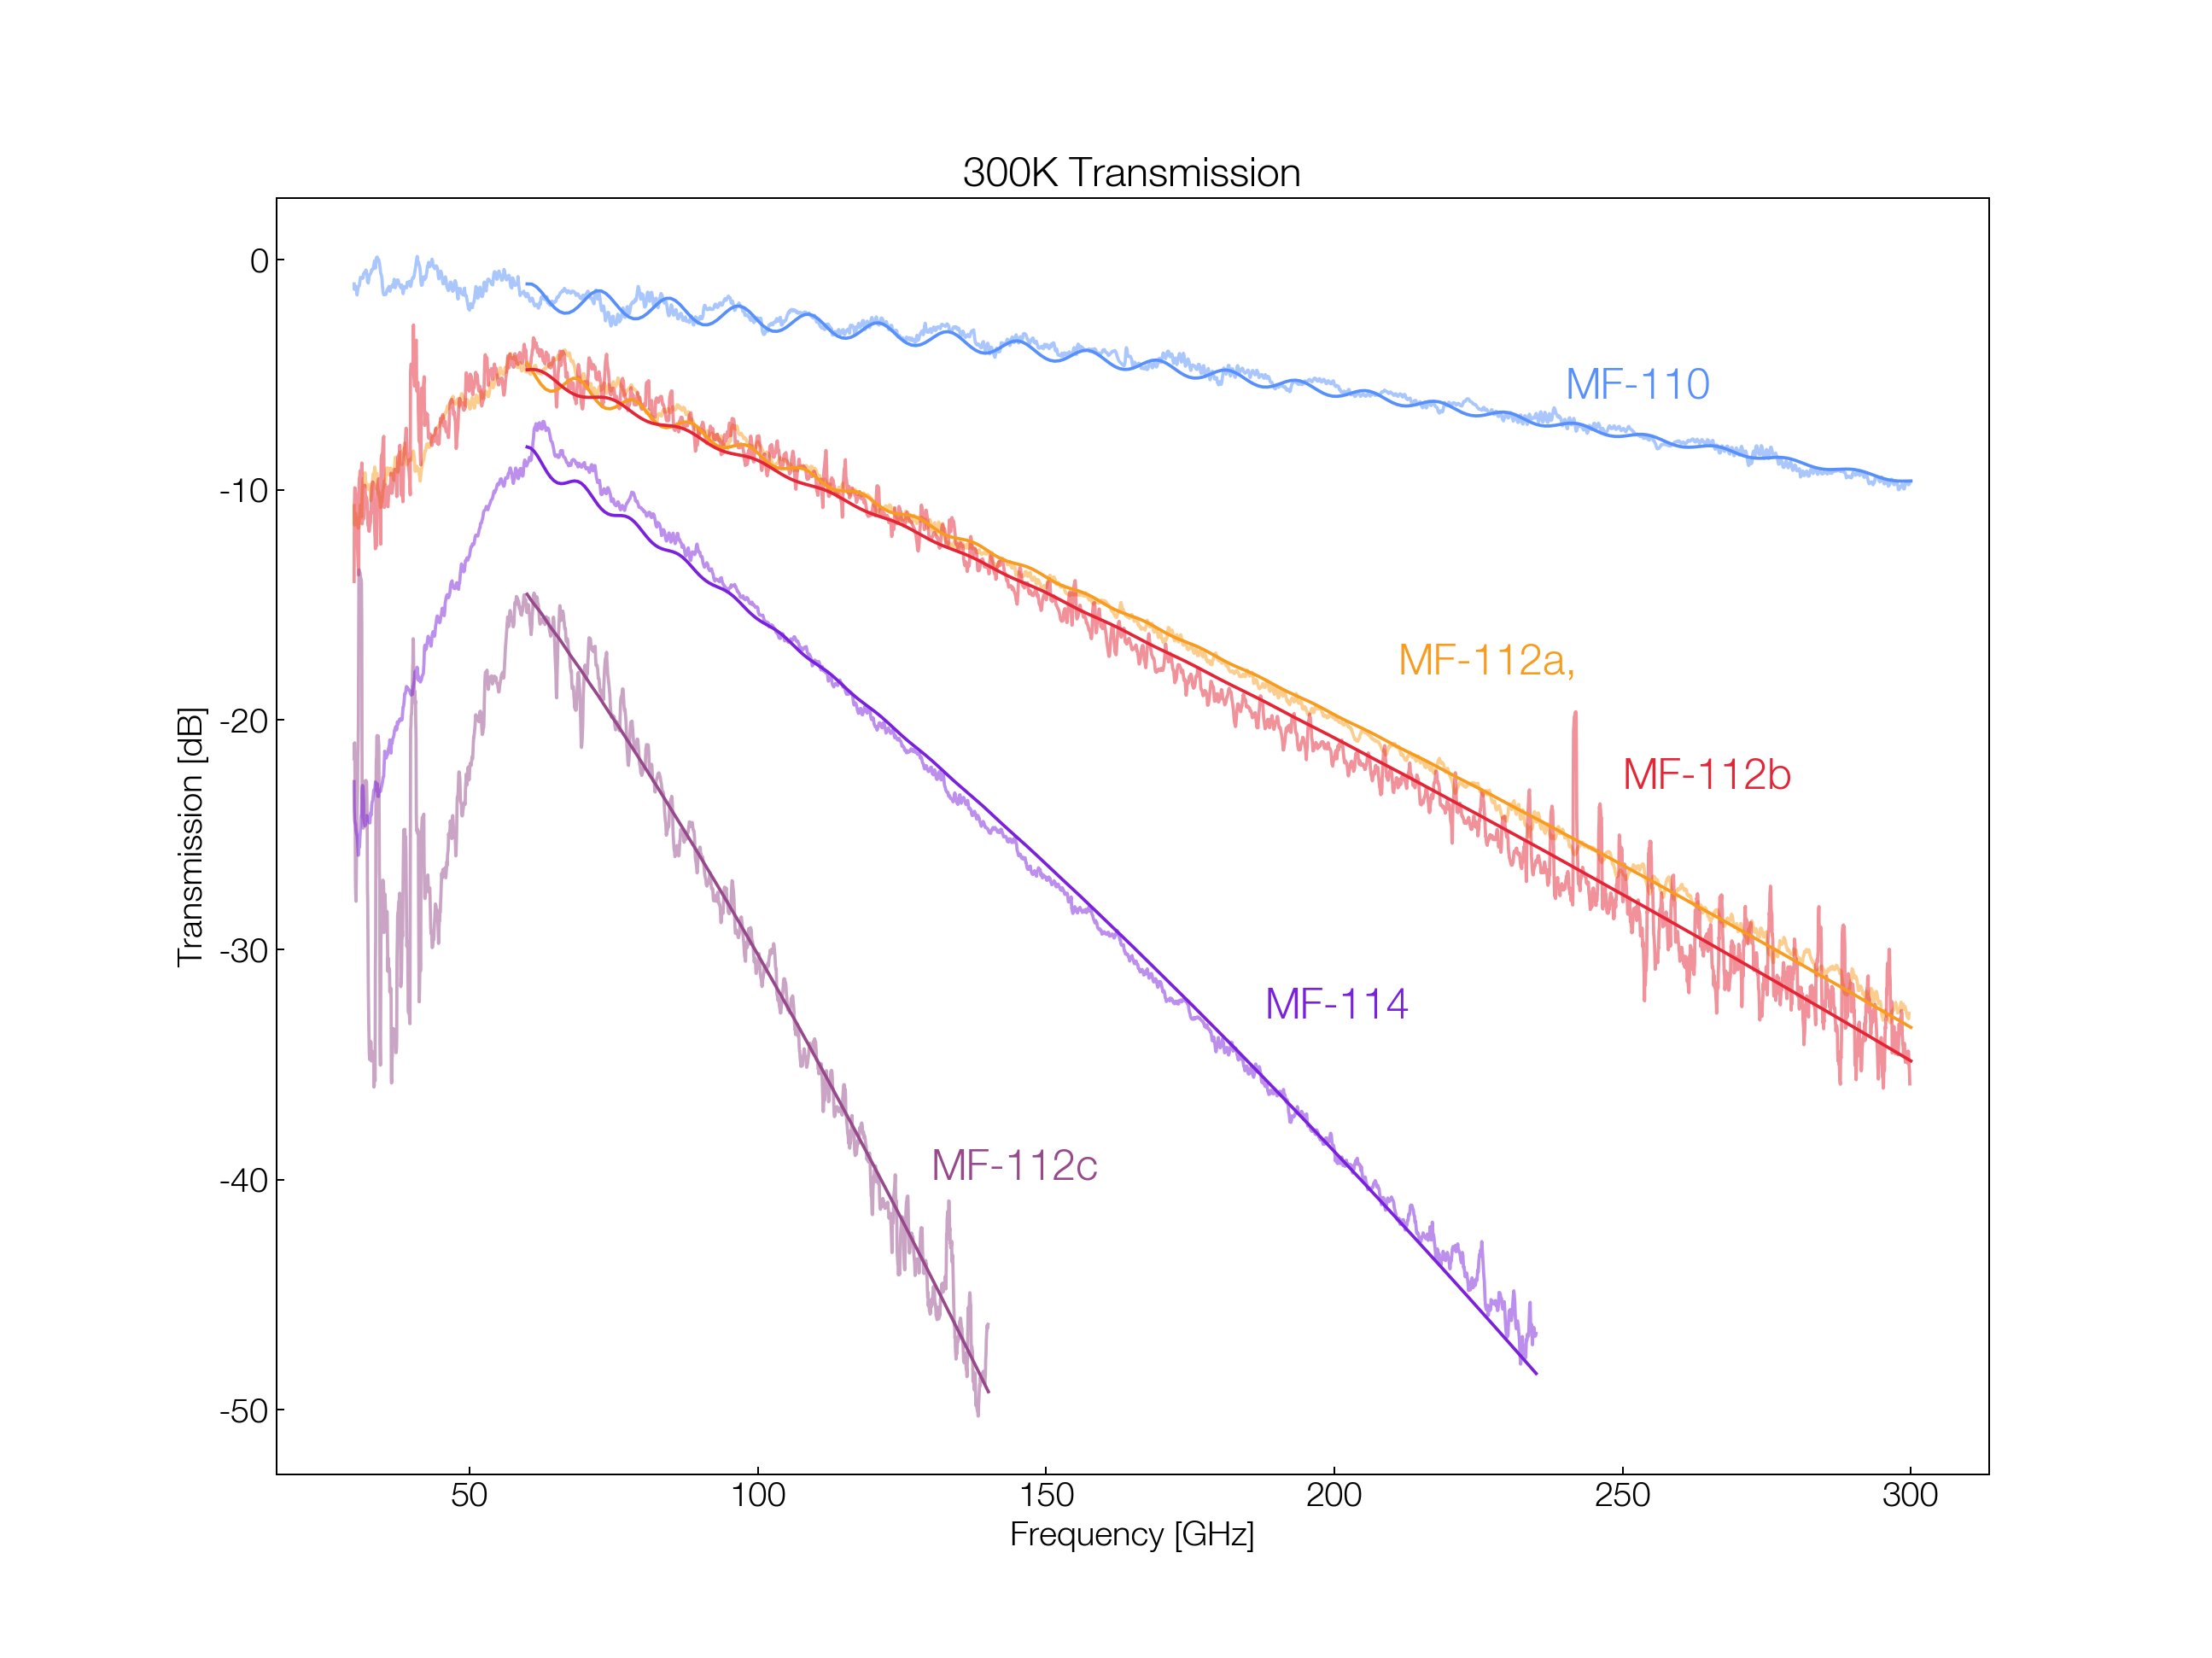

In [424]:
plt.figure(figsize=(8,6))
plt.grid(False)
plt.title("300K Transmission")
# plt.plot(meas_t_freqs_smooth_mf110, to_dB(meas_t_smooth_mf110))
# plt.plot(meas_t_freqs_smooth_mf112a, to_dB(meas_t_smooth_mf112a))
# plt.plot(meas_t_freqs_smooth_mf112b, to_dB(meas_t_smooth_mf112b))
# plt.plot(meas_t_freqs_smooth_mf112c, to_dB(meas_t_smooth_mf112c))
# plt.plot(meas_t_freqs_smooth_mf114, to_dB(meas_t_smooth_mf114))

plt.plot(meas_t_freqs_mf110, to_dB(meas_t_mf110), color='C0', alpha=0.5)
plt.plot(meas_t_freqs_mf112a, to_dB(meas_t_mf112a), color='C1', alpha=0.5)
plt.plot(meas_t_freqs_mf112b, to_dB(meas_t_mf112b), color='C2', alpha=0.5)
plt.plot(meas_t_freqs_mf112c, to_dB(meas_t_mf112c), color='C3', alpha=0.5)
plt.plot(meas_t_freqs_mf114, to_dB(meas_t_mf114), color='C5', alpha=0.5)

plt.plot(np.linspace(60, 300, 300), to_dB(calc_index_transmission(p110, np.linspace(60, 300, 300), thickness=tau110,angle = constants110[3])), color='C0', label="MF-110")
plt.plot(np.linspace(60, 300, 300), to_dB(calc_index_transmission(p112a, np.linspace(60, 300, 300), thickness=tau112a,angle = constants112a[3])), color='C1', label="MF-112a")
plt.plot(np.linspace(60, 300, 300), to_dB(calc_index_transmission(p112b, np.linspace(60, 300, 300), thickness=tau112b,angle = constants112b[3])), color='C2', label="MF-112b")
plt.plot(np.linspace(60, fmax112c,300 ), to_dB(calc_index_transmission(p112c, np.linspace(60, fmax112c, 300), thickness=tau112c,angle = constants112c[3])), color='C3', label="MF-112c")
plt.plot(np.linspace(60, fmax114,300 ), to_dB(calc_index_transmission(p114, np.linspace(60, fmax114, 300), thickness=tau114,angle = constants114[3])), color='C5', label="MF-114")

plt.text(240, -6, "MF-110", color='C0', fontsize=20, fontweight=20)
plt.text(211, -18, "MF-112a,", color='C1', fontsize=20, fontweight=20)
plt.text(250, -23, "MF-112b", color='C2', fontsize=20, fontweight=20)
plt.text(130, -40, "MF-112c", color='C3', fontsize=20, fontweight=20)
plt.text(188, -33, "MF-114", color='C5', fontsize=20, fontweight=20)

# plt.axhline(y=-13)
plt.ylabel("Transmission [dB]")
plt.xlabel("Frequency [GHz]")
plt.savefig("/home/shreyas/figures/ndf_300k_transmission.svg")
# plt.legend()
plt.show()

Below are plots comparing MF-114 at 300K and 77K.

In [47]:
MF114_trans = np.genfromtxt("/data/users/shreyas/final_ndf_files/transmission2021_77k/mf114_transm_77k_30-300ghz_20211203.txt")
MF114_reflect = np.genfromtxt("/data/users/shreyas/final_ndf_files/reflection2021/mf114_refl_uchi_30-500GHz_300K.txt")

fmax_77k = 300

msk = np.all([ MF114_reflect[:,0]<= fmax], axis=0)
meas_r_freqs_mf114_77k = MF114_reflect[msk,0]
meas_r_mf114_77k = MF114_reflect[msk,1]

msk = np.all([ MF114_trans[:,0]<= fmax], axis=0)

meas_t_freqs_mf114_77k = MF114_trans[msk,0]
meas_t_mf114_77k = MF114_trans[msk,1]

win=41

meas_r_freqs_smooth_mf114_77k = smooth(meas_r_freqs_mf114_77k,win)[win:-win]
meas_r_smooth_mf114_77k = smooth(meas_r_mf114_77k,win)[win:-win]
meas_t_freqs_smooth_mf114_77k = smooth(meas_t_freqs_mf114_77k,win)[win:-win]
meas_t_smooth_mf114_77k = smooth(meas_t_mf114_77k,win)[win:-win]

In [65]:
p114_77k = [2.80234913, 60, 0.0892266 , 0.46636993]
tau114=6.296*u.mm
constants114_77k = [tau114, # thickness ta
                  v0, #pivot freq, GHz
    np.radians(13.5), # reflection
    np.radians(17), # transmission # 77K transmission angle is different
]

<IPython.core.display.Javascript object>


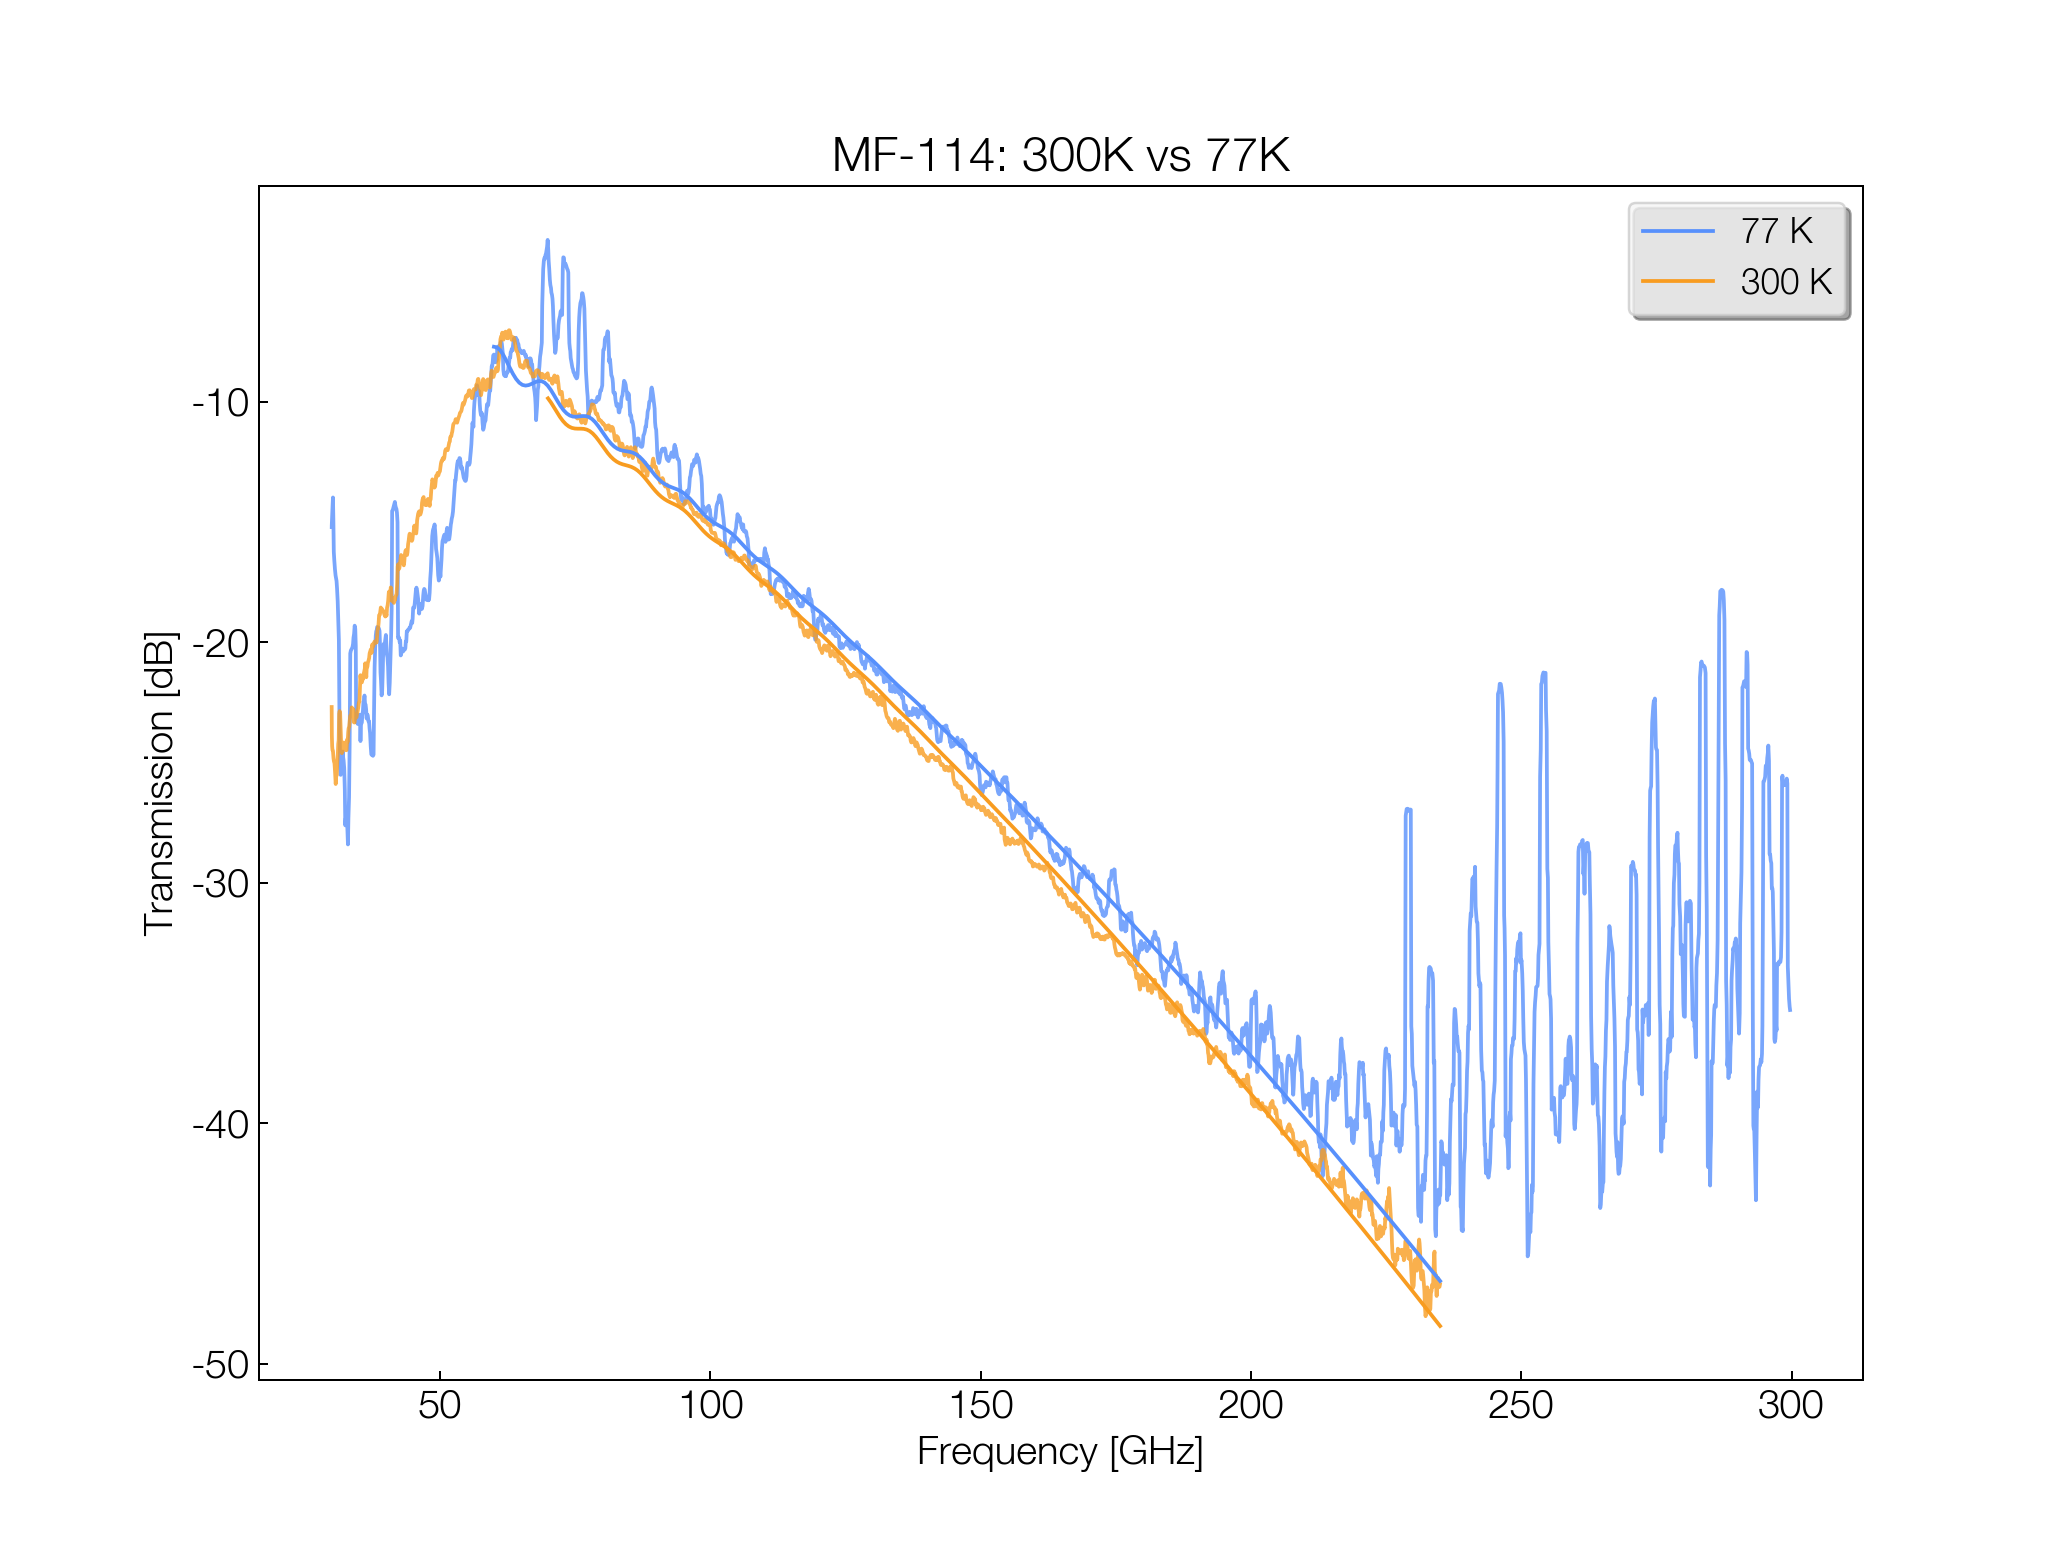

In [426]:
plt.figure()
plt.title("MF-114: 300K vs 77K")
plt.grid(False)
plt.plot(meas_t_freqs_mf114_77k, to_dB(meas_t_mf114_77k), color='C0', alpha=0.8)
plt.plot(meas_t_freqs_mf114, to_dB(meas_t_mf114), color='C1', alpha=0.8)

plt.plot(np.linspace(60, fmax114,300 ), to_dB(calc_index_transmission(p114_77k, np.linspace(60, fmax114, 300), thickness=tau114,angle = constants114[3])), color='C0', label="77 K")
plt.plot(np.linspace(70, fmax114,300 ), to_dB(calc_index_transmission(p114, np.linspace(70, fmax114, 300), thickness=tau114,angle = constants114[3])), color='C1', label="300 K")

plt.xlabel("Frequency [GHz]")
plt.ylabel("Transmission [dB]")
plt.legend()
plt.savefig("/home/shreyas/figures/ndf_mf114_300k_77k.svg")
plt.show()

Below are NDF Reflection Measurements.

<IPython.core.display.Javascript object>


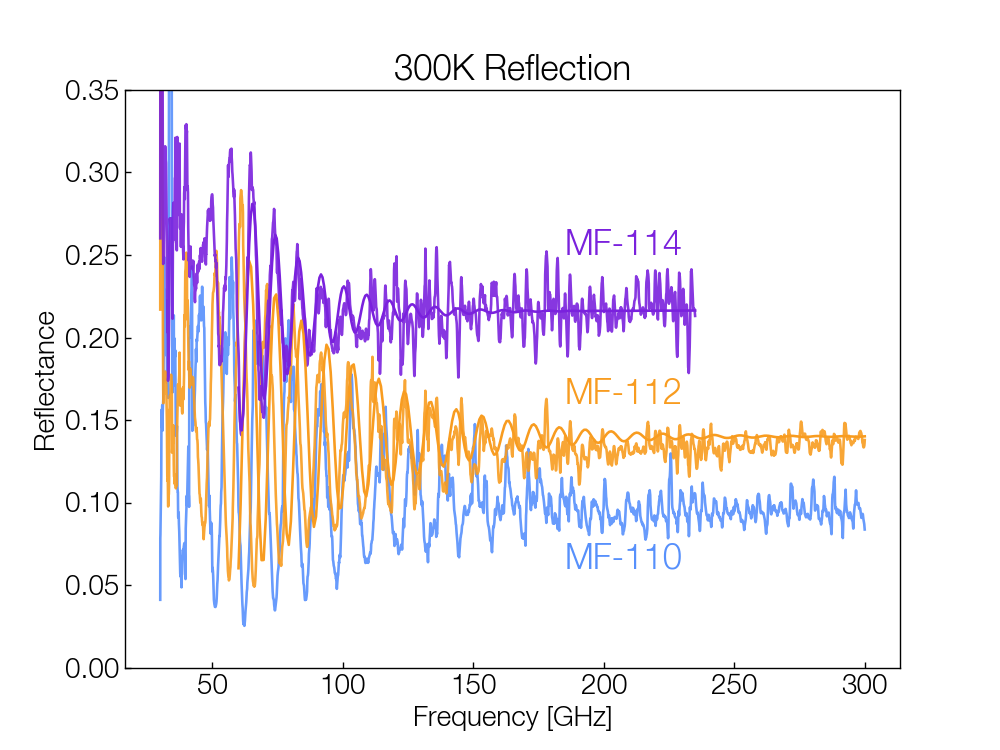

In [320]:
plt.figure(figsize=(8,6))
plt.grid(False)
plt.title("300K Reflection", fontsize=20)
# plt.plot(meas_t_freqs_smooth_mf110, to_dB(meas_t_smooth_mf110))
# plt.plot(meas_t_freqs_smooth_mf112a, to_dB(meas_t_smooth_mf112a))
# plt.plot(meas_t_freqs_smooth_mf112b, to_dB(meas_t_smooth_mf112b))
# plt.plot(meas_t_freqs_smooth_mf112c, to_dB(meas_t_smooth_mf112c))
# plt.plot(meas_t_freqs_smooth_mf114, to_dB(meas_t_smooth_mf114))

plt.plot(meas_r_freqs_mf110, (meas_r_mf110), color='C0', alpha=0.9,label='MF-110')
plt.plot(meas_r_freqs_mf112a, (meas_r_mf112a), color='C1', alpha=0.9,label='MF-112a')
# plt.plot(meas_r_freqs_mf112b, (meas_r_mf112b), color='C2', alpha=0.5,label='MF-112b')
# plt.plot(meas_r_freqs_mf112c, (meas_r_mf112c), color='C3', alpha=0.5,label='MF-112c')
plt.plot(meas_r_freqs_mf114, (meas_r_mf114), color='C5', alpha=0.9,label='MF-114')

# plt.plot(np.linspace(60, 300, 300), (calc_index_reflection(p110, np.linspace(60, 300, 300), thickness=tau110,angle = constants110[2])), color='C0', label="MF-110")
plt.plot(np.linspace(60, 300, 300), (calc_index_reflection(p112a, np.linspace(60, 300, 300), thickness=tau112a,angle = constants112a[2])), color='C1')#, label="MF-112a")
# plt.plot(np.linspace(60, 300, 300), (calc_index_reflection(p112b, np.linspace(60, 300, 300), thickness=tau112b,angle = constants112b[2])), color='C2', label="MF-112b")
# plt.plot(np.linspace(60, fmax112c,300 ), (calc_index_reflection(p112c, np.linspace(60, fmax112c, 300), thickness=tau112c,angle = constants112c[2])), color='C3', label="MF-112c")
plt.plot(np.linspace(60, fmax114,300 ), (calc_index_reflection(p114, np.linspace(60, fmax114, 300), thickness=tau114,angle = constants114[2])), color='C5')#, label="MF-114")
plt.text(185, 0.06, "MF-110", color='C0', fontsize=20, fontweight=20)
plt.text(185, 0.16, "MF-112", color='C1', fontsize=20, fontweight=20)
plt.text(185, 0.25, "MF-114", color='C5', fontsize=20, fontweight=20)
plt.ylabel("Reflectance")
plt.xlabel("Frequency [GHz]")
plt.ylim(0, 0.35)
# plt.xlim(40, 230)
# plt.legend()
plt.show()

In [323]:
MF110_reflect = np.genfromtxt("/data/users/shreyas/final_ndf_files/reflection2021/mf110_refl_uchi_30-500GHz_300K.txt")
MF112a_reflect = np.genfromtxt("/data/users/shreyas/final_ndf_files/reflection2021/mf112_refl_uchi_30-500GHz_300K.txt")
MF112b_reflect = np.genfromtxt("/data/users/shreyas/final_ndf_files/reflection2021/mf112_refl_ucsd_30-500GHz_300K.txt")
MF114_reflect = np.genfromtxt("/data/users/shreyas/final_ndf_files/reflection2021/mf114_refl_uchi_30-500GHz_300K.txt")

# fmax = 300

# msk = np.all([ MF110_reflect[:,0]<= fmax], axis=0)
# meas_r_freqs_mf110 = MF110_reflect[msk,0]
# meas_r_mf110 = MF110_reflect[msk,1]

# msk = np.all([ MF110_trans[:,0]<= fmax], axis=0)

# meas_t_freqs_mf110 = MF110_trans[msk,0]
# meas_t_mf110 = MF110_trans[msk,1]

# win=41

# meas_r_freqs_smooth_mf110 = smooth(meas_r_freqs_mf110,win)[win:-win]
# meas_r_smooth_mf110 = smooth(meas_r_mf110,win)[win:-win]
# meas_t_freqs_smooth_mf110 = smooth(meas_t_freqs_mf110,win)[win:-win]
# meas_t_smooth_mf110 = smooth(meas_t_mf110,win)[win:-win]

In [326]:
meas_r_freqs_mf110 = MF110_reflect[:,0]
meas_r_mf110 = MF110_reflect[:,1]

meas_r_freqs_mf112a = MF112a_reflect[:,0]
meas_r_mf112a = MF112a_reflect[:,1]

meas_r_freqs_mf112b = MF112b_reflect[:,0]
meas_r_mf112b = MF112b_reflect[:,1]

meas_r_freqs_mf114 = MF114_reflect[:,0]
meas_r_mf114 = MF114_reflect[:,1]

<IPython.core.display.Javascript object>


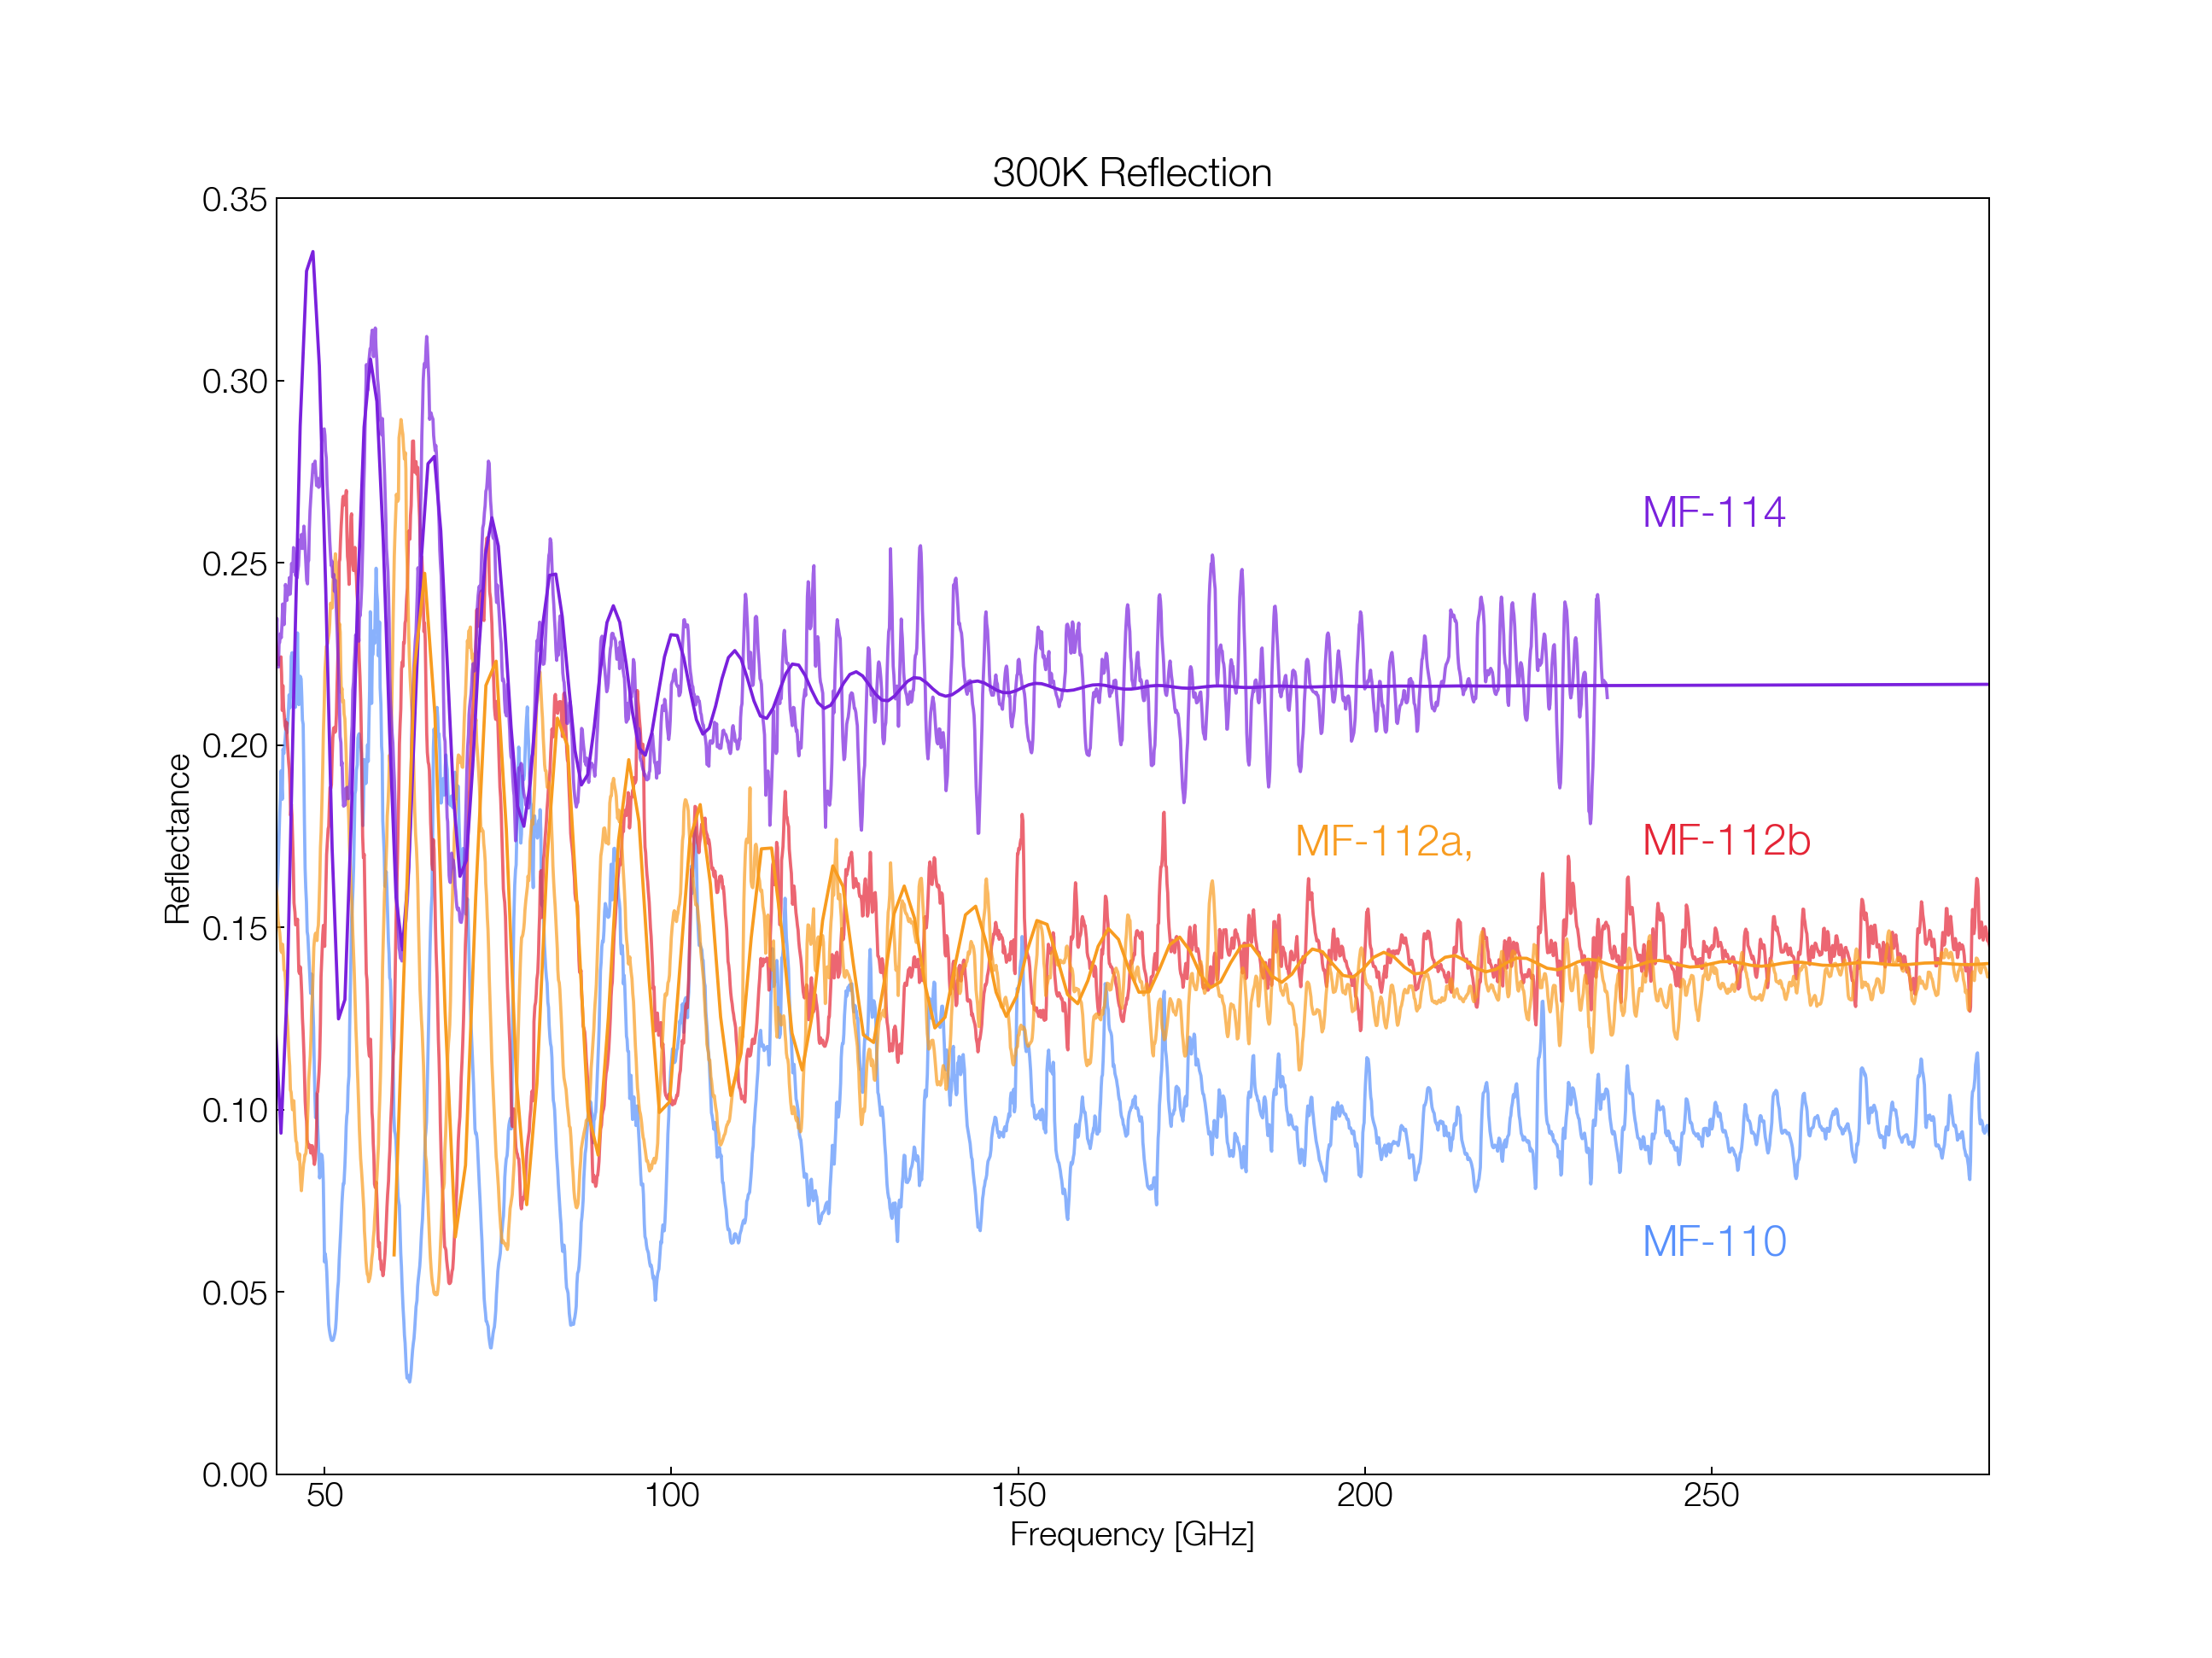

In [428]:
plt.figure(figsize=(8,6))
plt.grid(False)
plt.title("300K Reflection")
plt.plot(meas_r_freqs_mf110, meas_r_mf110, alpha=0.7, color='C0')
plt.plot(meas_r_freqs_mf112b, meas_r_mf112b, alpha=0.7, color='C2')
plt.plot(meas_r_freqs_mf112a, meas_r_mf112a, alpha=0.7, color='C1')
plt.plot(meas_r_freqs_mf114, meas_r_mf114, alpha=0.7, color='C5') 
plt.plot(np.linspace(40, 500,500 ), (calc_index_reflection(p114, np.linspace(40, 500, 500), thickness=tau114,angle = constants114[2])), color='C5')#, label="MF-114")
plt.plot(np.linspace(60, 500, 300), (calc_index_reflection(p112a, np.linspace(60, 500, 300), thickness=tau112a,angle = constants112a[2])), color='C1')#, label="MF-112a")
# plt.plot(np.linspace(60, 500, 300), (calc_index_reflection(p112a, np.linspace(60, 500, 300), thickness=tau112b,angle = constants112b[2])), color='C2')#, label="MF-112a")
plt.text(240, 0.06, "MF-110", color='C0', fontsize=20, fontweight=20)
plt.text(190, 0.17, "MF-112a, ", color='C1', fontsize=20, fontweight=20)
plt.text(240, 0.17, "MF-112b", color='C2', fontsize=20, fontweight=20)
plt.text(240, 0.26, "MF-114", color='C5', fontsize=20, fontweight=20)
plt.xlim(43, 290)
plt.ylim(0, 0.35)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Reflectance")
plt.savefig("/home/shreyas/figures/ndf_300k_reflection.svg")
plt.show()

<IPython.core.display.Javascript object>


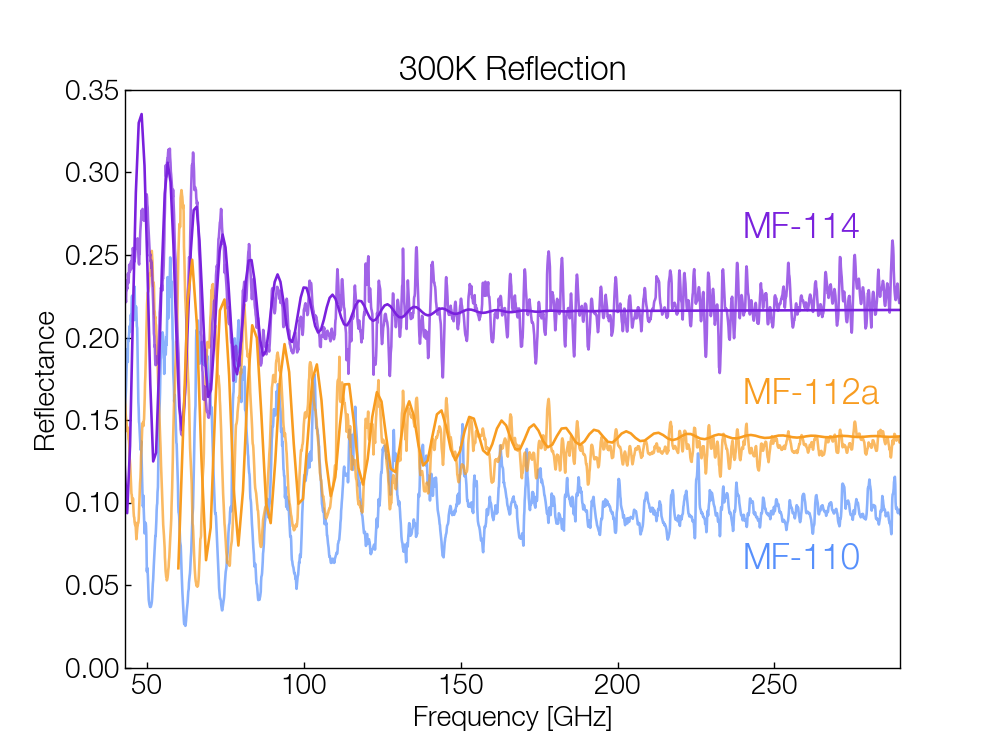

In [411]:
plt.figure(figsize=(8,6))
plt.grid(False)
plt.title("300K Reflection")
plt.plot(meas_r_freqs_mf110, meas_r_mf110, alpha=0.7, color='C0')
# plt.plot(meas_r_freqs_mf112b, meas_r_mf112b, alpha=0.7, color='C2')
plt.plot(meas_r_freqs_mf112a, meas_r_mf112a, alpha=0.7, color='C1')
plt.plot(meas_r_freqs_mf114, meas_r_mf114, alpha=0.7, color='C5') 
plt.plot(np.linspace(40, 500,500 ), (calc_index_reflection(p114, np.linspace(40, 500, 500), thickness=tau114,angle = constants114[2])), color='C5')#, label="MF-114")
plt.plot(np.linspace(60, 500, 300), (calc_index_reflection(p112a, np.linspace(60, 500, 300), thickness=tau112a,angle = constants112a[2])), color='C1')#, label="MF-112a")
# plt.plot(np.linspace(60, 500, 300), (calc_index_reflection(p112a, np.linspace(60, 500, 300), thickness=tau112b,angle = constants112b[2])), color='C2')#, label="MF-112a")
plt.text(240, 0.06, "MF-110", color='C0', fontsize=20, fontweight=20)
# plt.text(190, 0.17, "MF-112a ", color='C1', fontsize=20, fontweight=20)
plt.text(240, 0.16, "MF-112a ", color='C1', fontsize=20, fontweight=20)
# plt.text(240, 0.17, "MF-112b", color='C2', fontsize=20, fontweight=20)
plt.text(240, 0.26, "MF-114", color='C5', fontsize=20, fontweight=20)
plt.xlim(43, 290)
plt.ylim(0, 0.35)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Reflectance")
plt.show()